In [1]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.9 MB/s eta 0:00:00


In [2]:
pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.8 MB/s eta 0:00:00


In [3]:
import netCDF4 as nc4
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [35]:
months_of_year = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

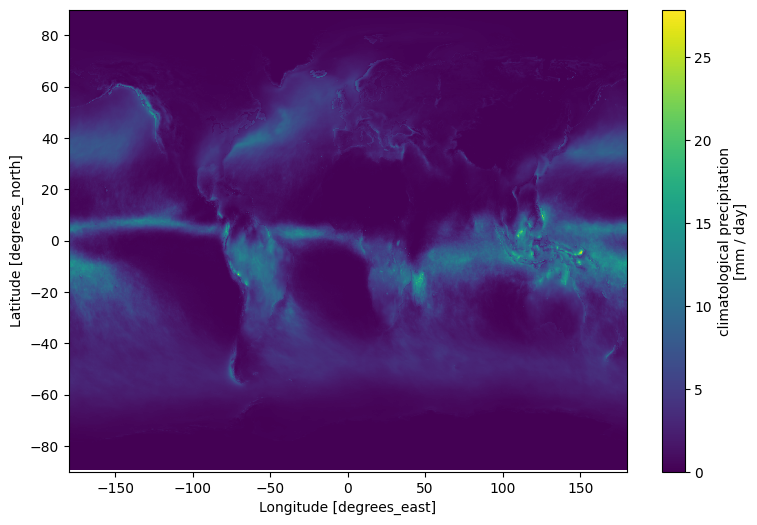

In [38]:
# Sample plot (for January)
fn = xr.open_dataset('/content/IMERG-Final.CLIM.2001-2022.01.V07B.nc4')
f = fn.precipitation

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(9, 6))
f_T = f.transpose('lat', 'lon')  # Swap 'lat' and 'lon' dimensions

# Plot the flipped data
f_T.plot(ax=ax)

In [36]:
def plot(x, y, precip):
  # Set the figure size, projection, and extent
  fig = plt.figure(figsize=(21,7))
  ax = plt.axes(projection=ccrs.PlateCarree())
  ax.set_extent([-180,180,-60,60])

  # Add coastlines and formatted gridlines
  ax.coastlines(resolution="110m",linewidth=1)
  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=1, color='black', linestyle='--')
  gl.xlabels_top = False
  gl.ylabels_right = False
  gl.xlines = True
  gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
  gl.ylocator = mticker.FixedLocator([-60, -50, -25, 0, 25, 50, 60])
  gl.xformatter = LONGITUDE_FORMATTER
  gl.yformatter = LATITUDE_FORMATTER
  gl.xlabel_style = {'size':16, 'color':'black'}
  gl.ylabel_style = {'size':16, 'color':'black'}

  # Set contour levels and draw the plot
  clevs = np.arange(0,30,1)
  plt.contourf(x, y, precip, clevs, cmap=plt.cm.rainbow)
  plt.title(f"GPM IMERG Global {months_of_year[month]} Mean Rain Rate", size=24)
  cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
  cb.set_label('mm / day',size=20)
  cb.ax.tick_params(labelsize=16)

  # Save figure
  fig.savefig(f"GPM Global {months_of_year[month]} precipitation climatology plot.png", bbox_inches='tight', pad_inches = 0.1)

In [ ]:
def process_file(file_path):
    dataset = xr.open_dataset(file_path)
    ds = dataset.precipitation
    print(f"Accessed precipitation data for {months_of_year[month]}")
    allprecip = ds.values
    # filled_precip = np.nan_to_num(allprecip, nan=100.0)
    masked_precip = np.ma.masked_invalid(allprecip)
    precip = np.transpose(masked_precip)
    theLats = ds.lat.values
    theLons = ds.lon.values
    x, y = np.float32(np.meshgrid(theLons, theLats))
    plot(x, y, precip)
    print(f"Done plotting for {months_of_year[month]}")


Processing month: January from: /content/IMERG-Final.CLIM.2001-2022.01.V07B.nc4
Accessed precipitation data for January
Done plotting for January

Processing month: February from: /content/IMERG-Final.CLIM.2001-2022.02.V07B.nc4
Accessed precipitation data for February
Done plotting for February

Processing month: March from: /content/IMERG-Final.CLIM.2001-2022.03.V07B.nc4
Accessed precipitation data for March
Done plotting for March

Processing month: April from: /content/IMERG-Final.CLIM.2001-2022.04.V07B.nc4
Accessed precipitation data for April
Done plotting for April

Processing month: May from: /content/IMERG-Final.CLIM.2001-2022.05.V07B.nc4
Accessed precipitation data for May
Done plotting for May

Processing month: June from: /content/IMERG-Final.CLIM.2001-2022.06.V07B.nc4
Accessed precipitation data for June
Done plotting for June

Processing month: July from: /content/IMERG-Final.CLIM.2001-2022.07.V07B.nc4
Accessed precipitation data for July
Done plotting for July

Processin

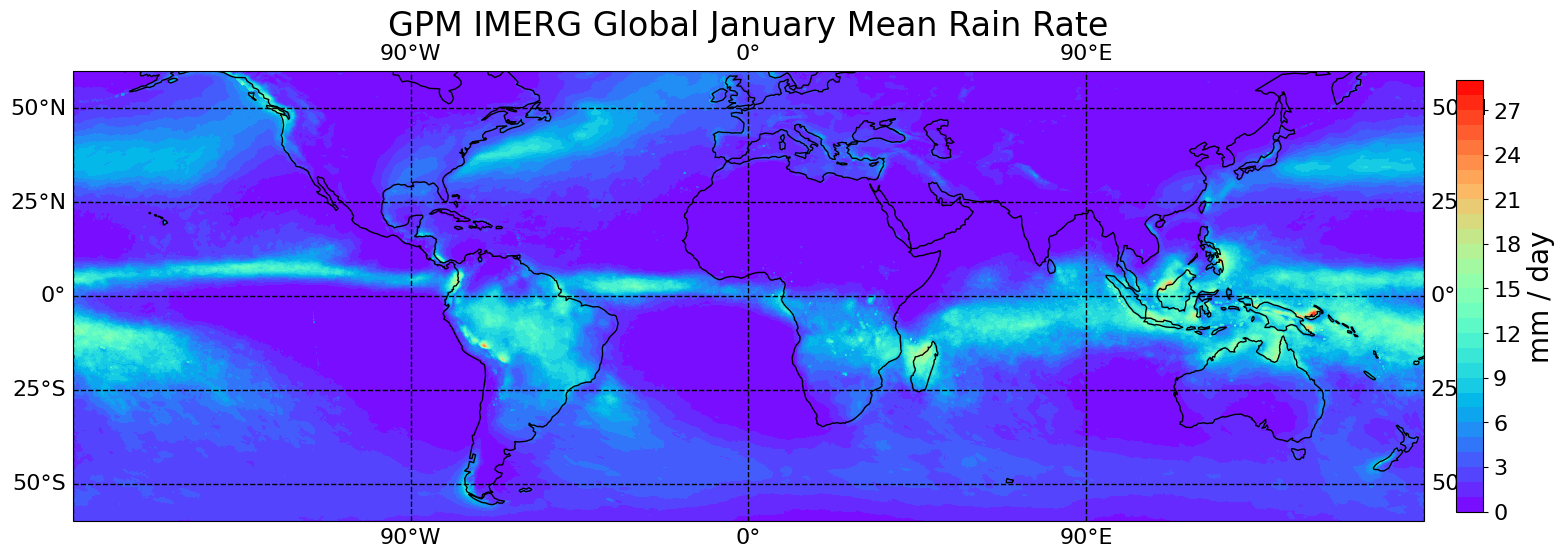

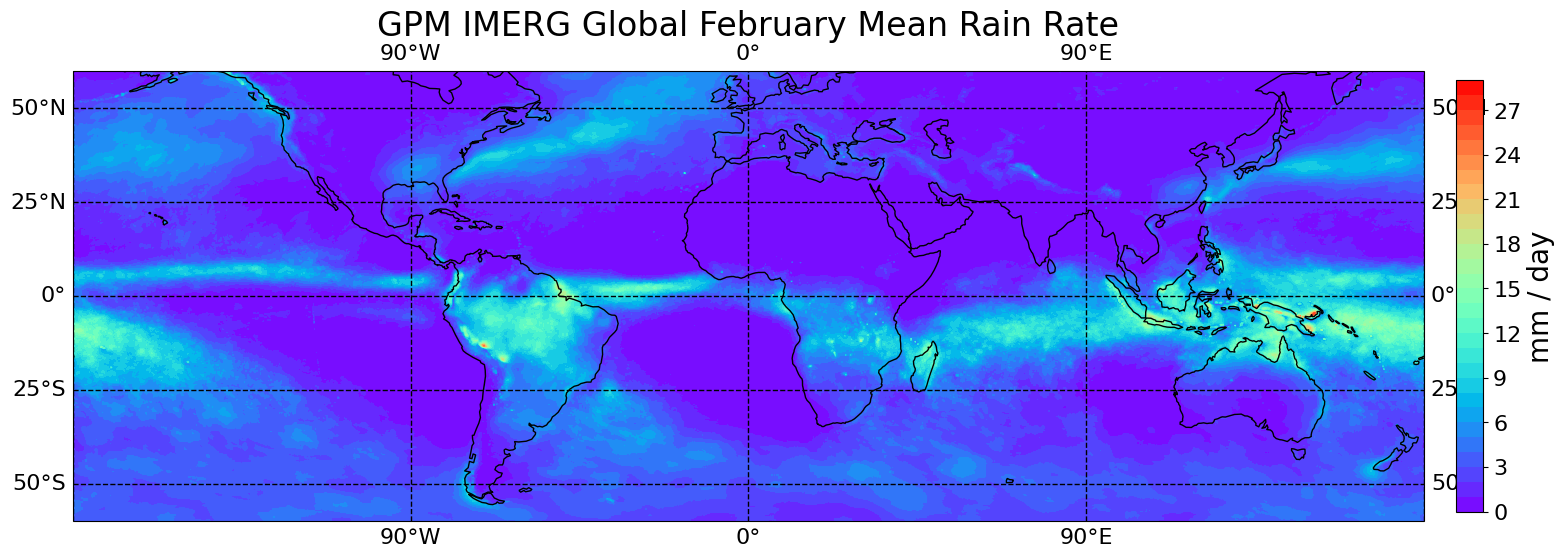

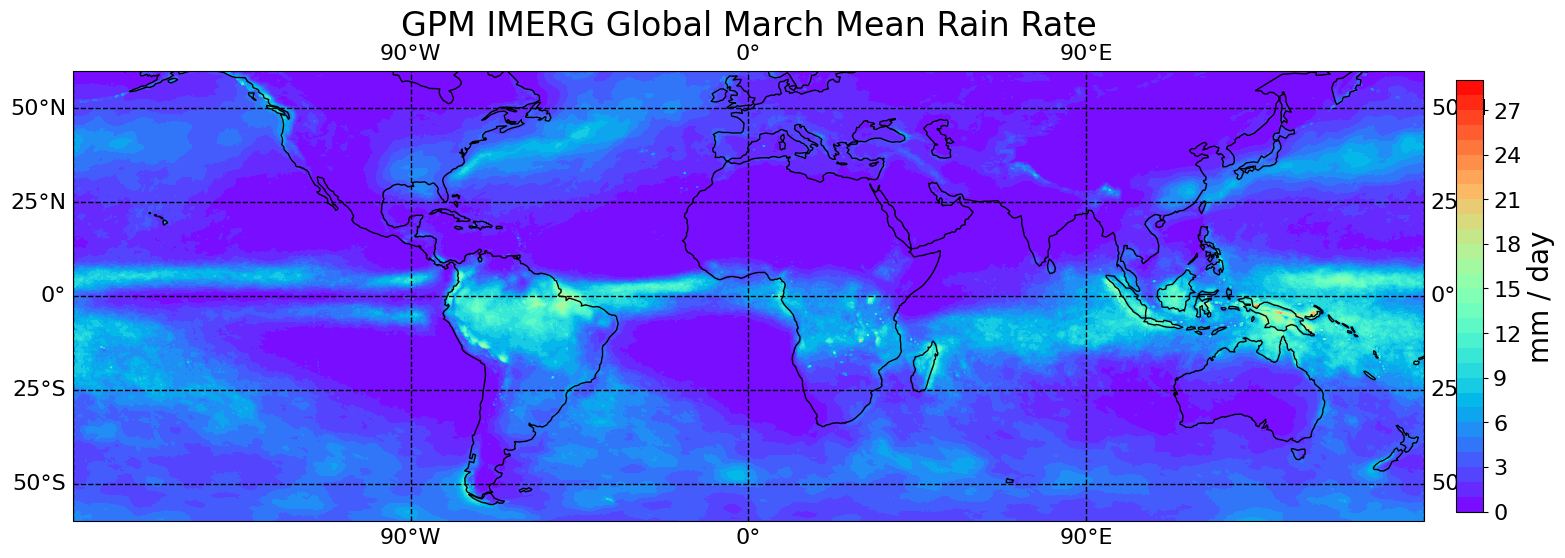

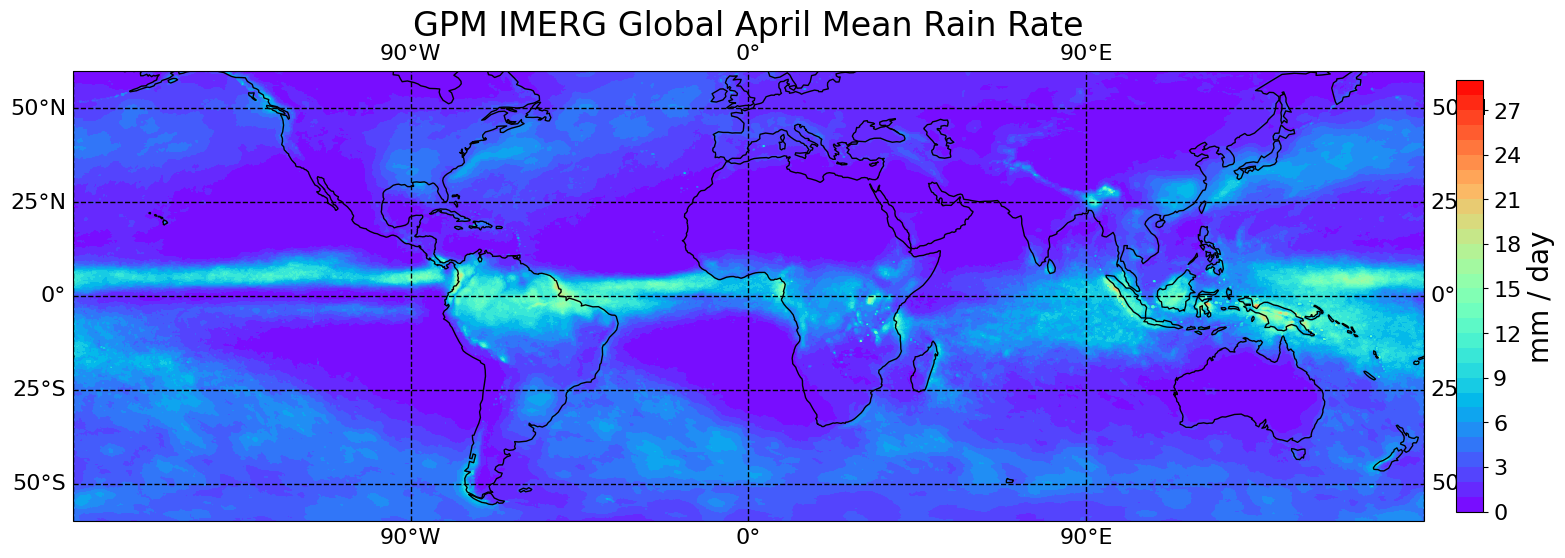

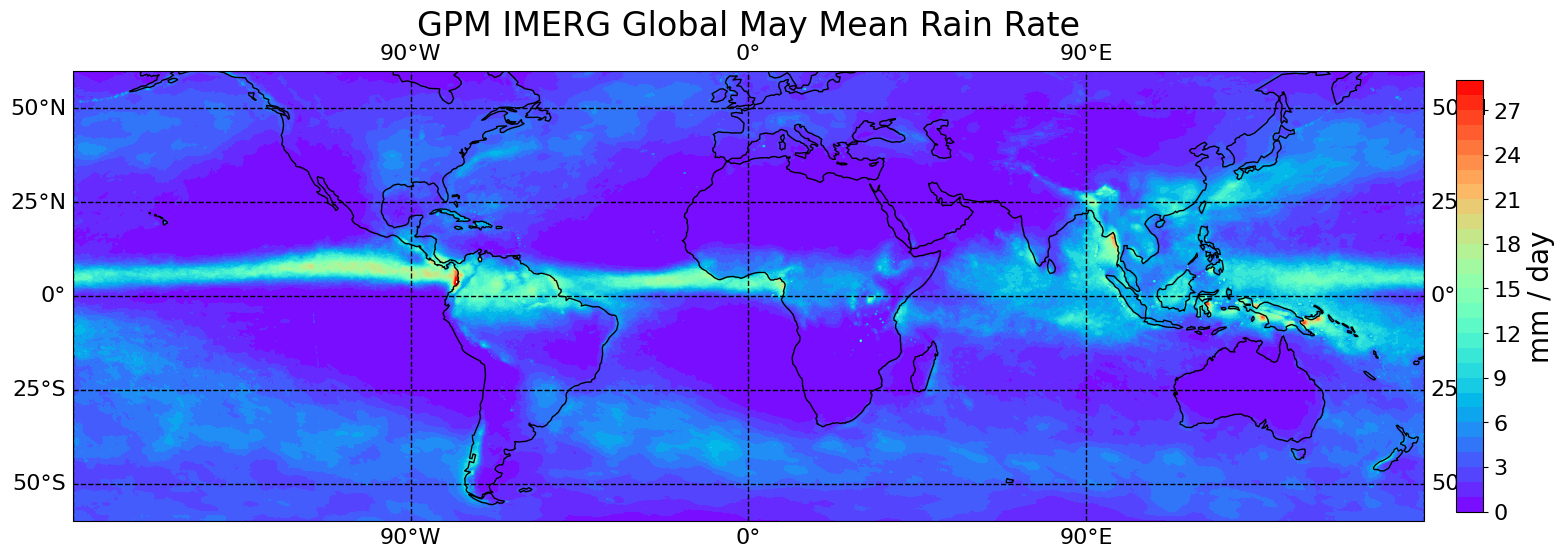

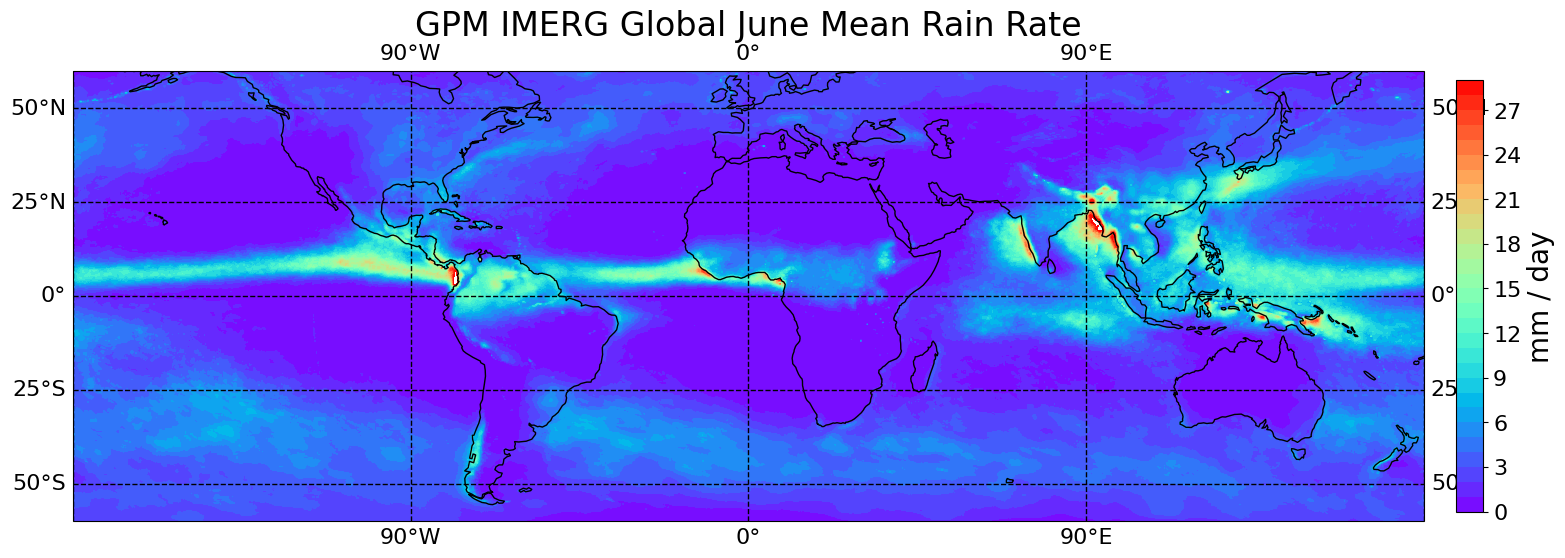

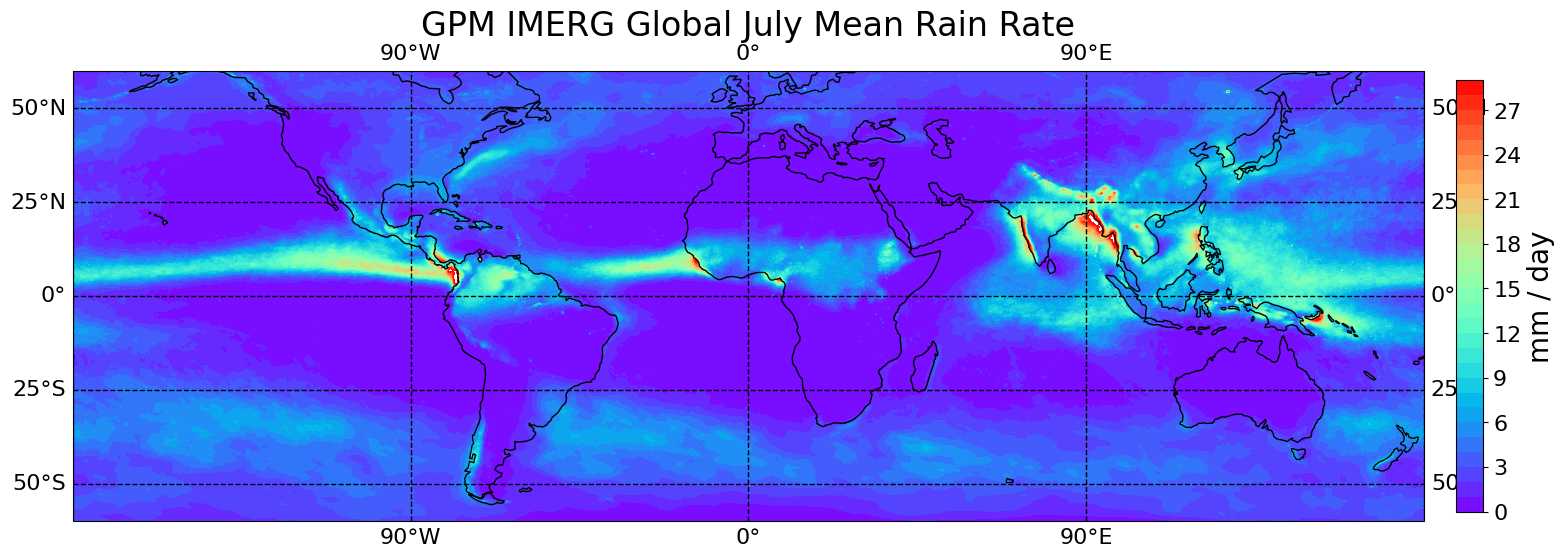

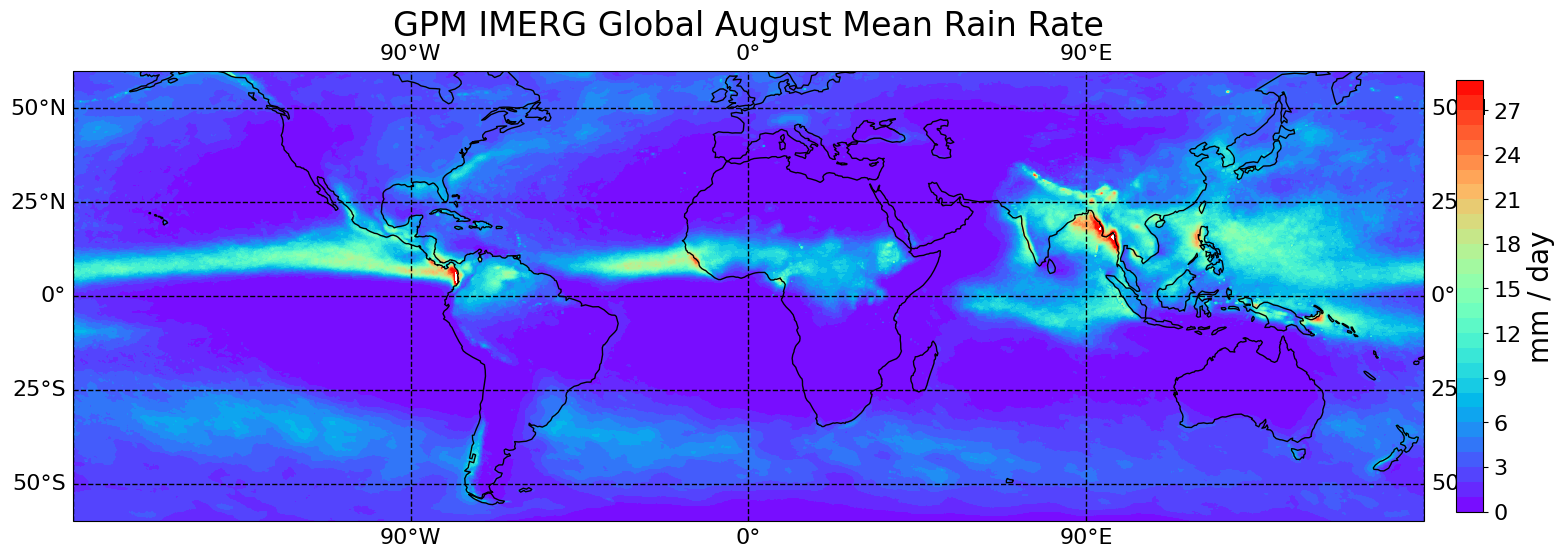

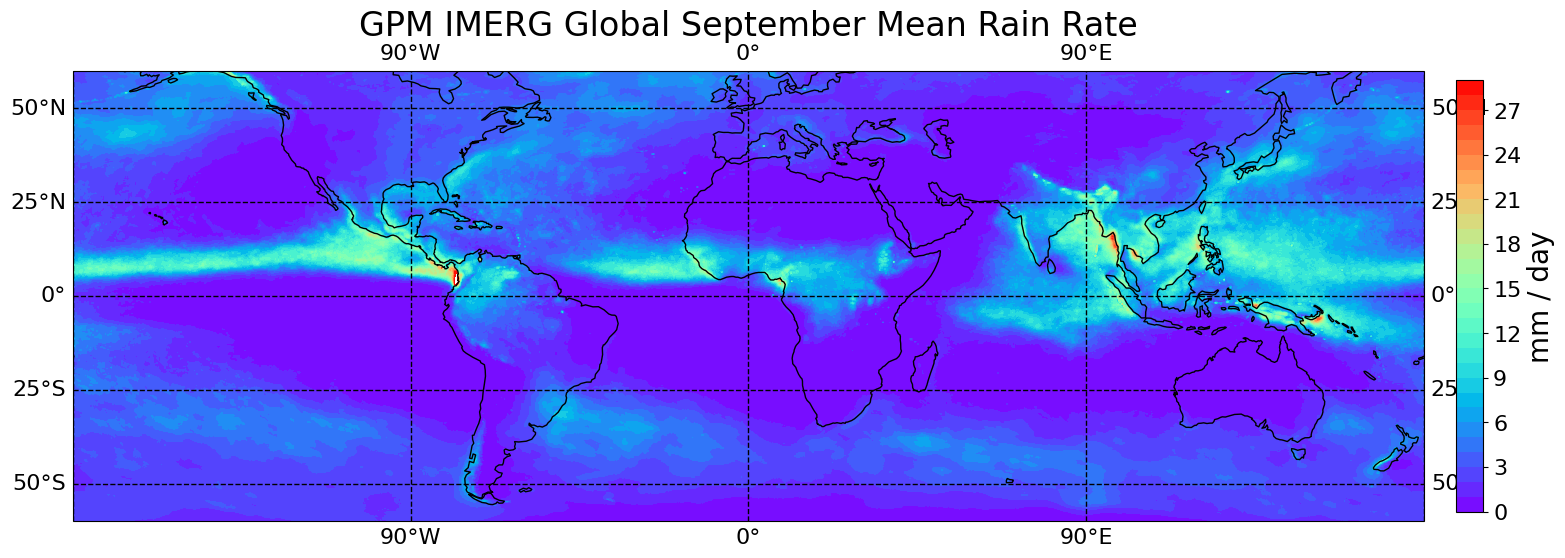

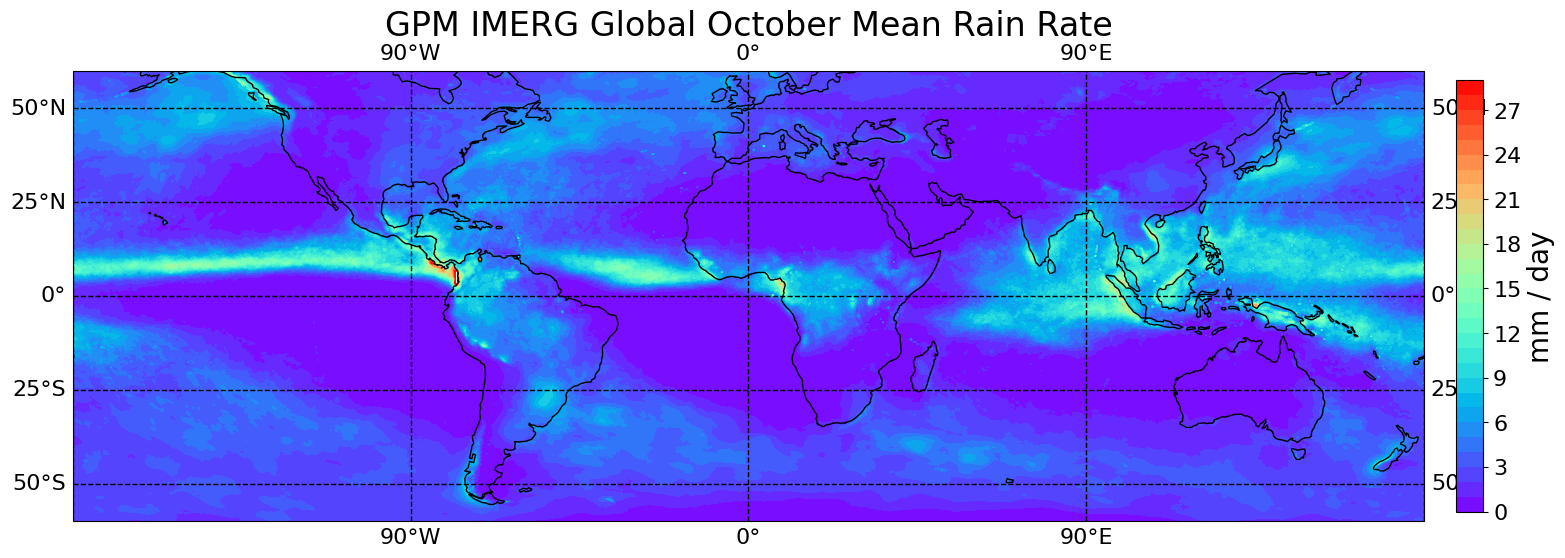

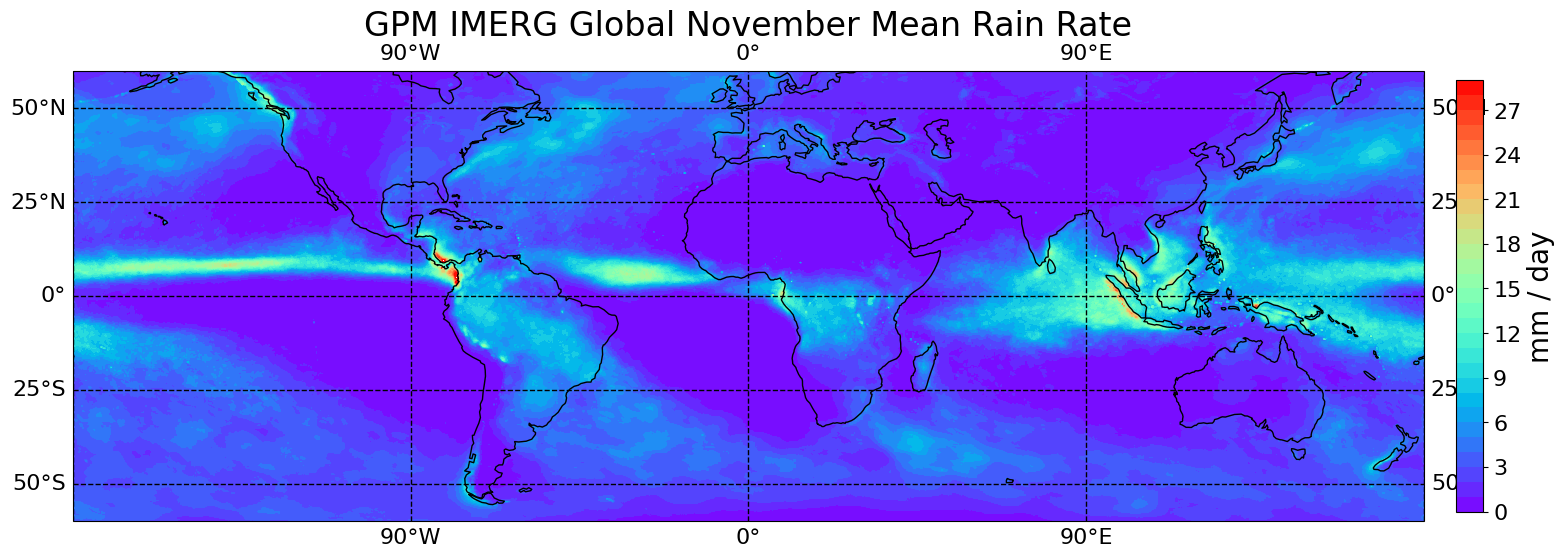

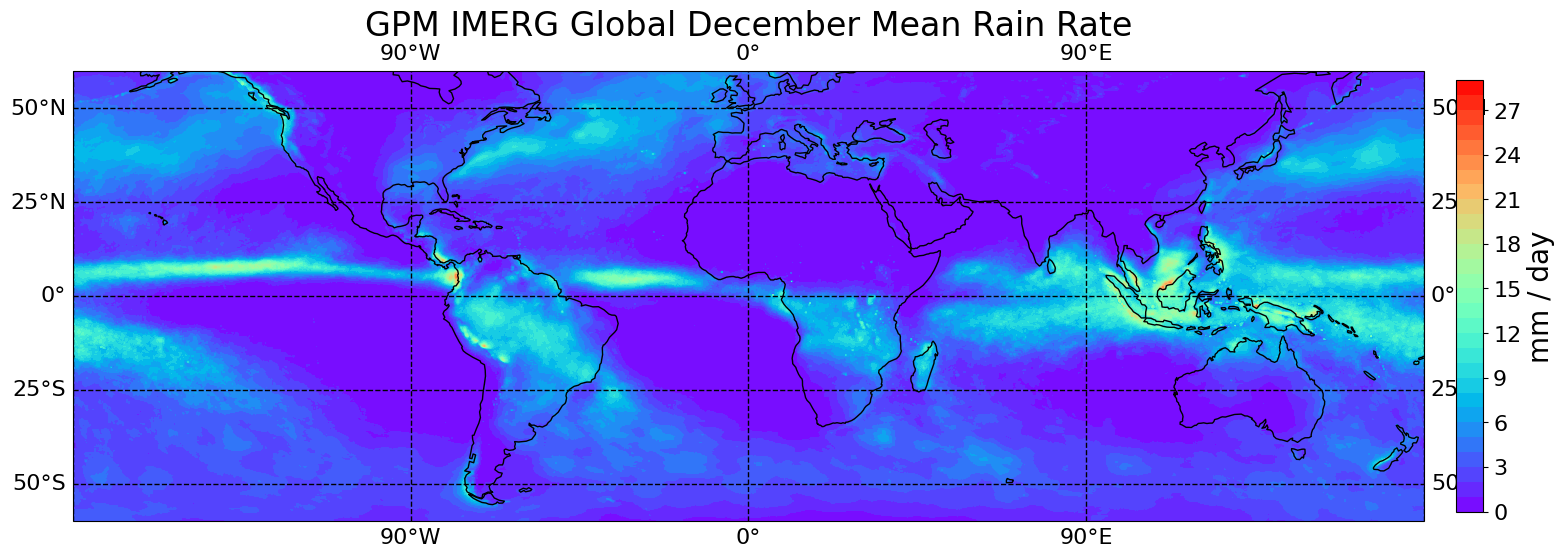

In [37]:
file_dir = '/content/'  # Directory for the data files
file_template = 'IMERG-Final.CLIM.2001-2022.{:02d}.V07B.nc4'  # File name template

for month in range(1, 13):
    month_str = "{:02d}".format(month)  # Format the month as two digits
    file_name = file_template.format(month)
    file_path = os.path.join(file_dir, file_name)

    print(f"\nProcessing month: {months_of_year[month]} from: {file_path}")
    # Process the file
    process_file(file_path)
